In [3]:
import numpy as np
import pandas as pd

## Object creation

#### Creating a Series by passing a list of values, letting pandas create a default integer index

In [ ]:
s = pd.Series([1 ,3, np.nan, 5, 6])
s

#### Creating a DataFrame by passing a NumPy array, with a datetime index and labeled columns:


In [ ]:
dates = pd.date_range('2019-08-14' , periods=6)
dates

In [ ]:
dates = pd.date_range('20190814' , periods=6)
dates

In [ ]:
np.random.rand(6, 4)

In [ ]:
np.random.randn(6, 4)

In [ ]:
#df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=['ABCD']) #ValueError: Shape of passed values is (4, 6), indices imply (1, 6)
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
df

#### Creating a DataFrame by passing a dict of objects that can be converted to series-like.

In [ ]:
df2 = pd.DataFrame({'A' : 1.,
                    'B' : pd.Timestamp('20180814'),
                    'C' : pd.Series(1, index=list(range(4)), dtype=np.float32),
                    'D' : np.array([3] * 4, dtype='int32'),
                    'E' : pd.Categorical(["test", "train", "test", "train"]),
                    'F' : 'foo'
    
                })
df2

In [ ]:
df2 = pd.DataFrame({'A' : 1.,
                    'B' : pd.Timestamp('20180814'),
                    'C' : pd.Series(1, index=list(range(1)), dtype=np.float32),
                    'D' : np.array([3], dtype='int32'),
                    'E' : pd.Categorical(["test", "train", "test", "train"]),
                    'F' : 'foo'
    
                })
df2

#### The columns of the resulting DataFrame have different dtypes

In [ ]:
df2.dtypes

## Viewing data

In [ ]:
df.head() #default  5 records

In [ ]:
df.head(3)

In [ ]:
df.tail()

In [ ]:
df.tail(3)

In [ ]:
df.index

In [ ]:
df.columns

__DataFrame.to_numpy()__ gives a NumPy representation of the underlying data. Note that this can be an expensive operation when your DataFrame has columns with different data types, which comes down to a fundamental difference between pandas and NumPy: __NumPy arrays have one dtype for the entire array, while pandas DataFrames have one dtype per column__. When you call DataFrame.to_numpy(), pandas will find the NumPy dtype that can hold all of the dtypes in the DataFrame. This may end up being object, which requires casting every value to a
Python object

#### DataFrame.to_numpy() does not include the index or column labels in the output

For df, our DataFrame of all floating-point values, DataFrame.to_numpy() is fast and doesn’t require copying data.

For df2, the DataFrame with multiple dtypes, DataFrame.to_numpy() is relatively expensive.

In [ ]:
df.to_numpy()

In [ ]:
df2.to_numpy()

#### describe() shows a quick statistic summary of your data:

In [ ]:
df.describe()

In [ ]:
df.T

In [ ]:
df.sort_index(axis=1, ascending=True)

In [ ]:
df.sort_index(axis=1, ascending=False)

In [ ]:
df.sort_index(axis=0, ascending=True)

In [ ]:
df.sort_index(axis=0, ascending=False)

In [ ]:
df.sort_values()

In [ ]:
df.sort_values(by='B')

## Selection

#### While standard Python / Numpy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, .at, .iat, .loc and .iloc.


### Selecting a single column, which yields a Series, equivalent to df.A:

In [ ]:
df.A

In [ ]:
df['A']

### Selecting via [], which slices the rows.

In [ ]:
df[0:3]

In [ ]:
df['2019-08-14':'2019-08-17']

## Selection by label

### For getting a cross section using a label:

In [ ]:
df.loc[dates[0]]

### Selecting on a multi-axis by label:


In [ ]:
df.loc[:, ['A','B']]

#### df.loc[:, 2:3] - TypeError: cannot do slice indexing on <class 'pandas.core.indexes.base.Index'> with these indexers [2] of <clas

### Showing label slicing, both endpoints are included:

In [ ]:
df.loc['2019-08-14':'2019-08-17', ['A','B']]

### Reduction in the dimensions of the returned object:

In [ ]:
df.loc['2019-08-14', ['A','B']]

In [ ]:
df.loc['2019-08-14', ['A']]

### For getting a scalar value:

In [ ]:
df.loc['2019-08-14', 'A']

### For getting fast access to a scalar (equivalent to the prior method):

In [ ]:
#df.at['2019-08-14', 'A'] -- #KeyError: '2019-08-14'
df.at[dates[0], 'A']

#### df[3] #KeyError: 3
#### df.loc[3] #TypeError: cannot do index indexing on <class 'pandas.core.indexes.datetimes.DatetimeIndex'> with these indexers [3] of <class 'int'>
#### df.loc[[3]] - KeyError: 'None of [[3]] are in the [index]'

### Selection by position

In [ ]:
df.iloc[3]

### By integer slices, acting similar to numpy/python

In [ ]:
df.iloc[3:5, 0:2]

In [ ]:
df.iloc[[1, 2, 4], [0, 2]]

#### For slicing rows explicitly:

In [ ]:
df.iloc[1:3, :]

#### For slicing columns explicitly:

In [ ]:
df.iloc[:, 1:3]

#### For getting a value explicitly:

In [ ]:
df.iloc[1, 1]

#### For getting fast access to a scalar (equivalent to the prior method):

In [ ]:
df.iat[1, 1]

In [ ]:
df.iloc[:, 1]

## Boolean indexing

### Using a single column’s values to select data.

In [ ]:
df[df.A > 0]

### Selecting values from a DataFrame where a boolean condition is met

In [ ]:
df[df > 0]

### Using the isin() method for filtering

In [ ]:
df3 = df.copy

In [ ]:
df3

In [ ]:
df3 = df.copy()
df3['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df3

In [ ]:
df3[df3['E'].isin(['two','one'])]

## Setting

### Setting a new column automatically aligns the data by the indexes.

In [ ]:
s1 = pd.Series(1, index=pd.date_range('20190815', periods=6))
s1

In [ ]:
s1 = pd.Series([1] * 6, index=pd.date_range('20190815', periods=6))
s1

In [ ]:
s1 = pd.Series([1] , index=pd.date_range('20190815', periods=6))
s1

In [ ]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range('20190815', periods=6))
s1

In [ ]:
df['F'] = s1

In [ ]:
df.loc[dates[0], 'A'] = 0

In [ ]:
df.iat[0, 'A'] = 0

In [ ]:
df.iat[0, 1] = 0

In [ ]:
 df.loc[:, 'D'] = np.array([5] * len(df))

In [ ]:
df

In [ ]:
 df.loc[:, 'D'] = np.array([5])
df

### A where operation with setting.

In [ ]:
df3 = df.copy()
df3[df3 > 0] = -df3
df3

## Missing data

### pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations

### Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.

In [ ]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + 'E')

In [ ]:
#df1 = df.reindex(index=dates[0:4], columns=[df.columns] + ['E']) #ypeError: unhashable type: 'Index'
df1 = df.reindex(index=dates[0:4], columns=df.columns + ['E'])
df1

In [ ]:
#df1 = df.reindex(index=dates[0:4], columns=[list(df.columns)] + ['E']) #TypeError: unhashable type: 'list'
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1

In [ ]:
df1.loc[dates[0]:dates[1], 'E'] = 1
df1

### To drop any rows that have missing data.

In [ ]:
df1.dropna(how='any')

### Filling missing data.

In [ ]:
df1.fillna(value=5)

## Stats

In [ ]:
df.mean()

### Same operation on the other axis:

In [ ]:
df.mean(1)

### Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically broadcasts along the specified dimension.

In [ ]:
df

In [ ]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates)
s

In [ ]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)
s

In [ ]:
df.shape

In [ ]:
s.shape

In [ ]:
df.sub(s, axis='index')

In [ ]:
df.sub(s, axis=0)

## Apply

In [ ]:
df.apply(np.cumsum)

In [ ]:
df.apply(lambda x: x.max() - x.min())

## Histogramming

In [ ]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

In [ ]:
s.value_counts()

## String Methods

Series is equipped with a set of string processing methods in the str attribute that make it easy to operate on each element of the array, as in the code snippet below. Note that pattern-matching in str generally uses regular expressions by default 

In [ ]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

In [ ]:
s.str.lower()

## Merge

### Concat

pandas provides various facilities for easily combining together Series and DataFrame objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations

In [ ]:
df = pd.DataFrame(np.random.rand(10,4))
df

#### break it into pieces

In [ ]:
pieces = [df[:3], df[3:7], df[7:]]

In [ ]:
pieces

In [ ]:
pd.concat(df)

In [ ]:
pd.concat(pieces)

## Join

### SQL style merges. See the Database style joining section.

In [ ]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})

In [ ]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [ ]:
left

In [ ]:
right

In [ ]:
pd.merge(left, right, on='key')

In [ ]:
pd.concat(left, right)

In [ ]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})

In [ ]:
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})

In [ ]:
pd.merge(left, right, on='key')

## Append

### Append rows to a dataframe

In [ ]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])

In [ ]:
s = df.iloc[3]

In [ ]:
df.append(s, ignore_index=True)

In [ ]:
df.append(s, ignore_index=False) # or df.append(s)

## Grouping

### By “group by” we are referring to a process involving one or more of the following steps:
#### Splitting the data into groups based on some criteria
#### Applying a function to each group independently
#### Combining the results into a data structure

In [ ]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar','foo', 'bar', 'foo', 'foo'],
                       'B': ['one', 'one', 'two', 'three','two', 'two', 'one', 'three'],
                       'C': np.random.randn(8),
                       'D': np.random.randn(8)})

In [ ]:
df

In [ ]:
df.groupby('A').sum

In [ ]:
df.groupby('A').sum()

In [ ]:
df.groupby(['A', 'B']).sum()

## Reshaping

In [ ]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz','foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two','one', 'two', 'one', 'two']]))

In [ ]:
index = pd.MultiIndex.from_tuples(tuples, names=['first','second'])
df = pd.DataFrame(np.random.rand(8, 2), index=index, columns=['A','B'])
df

In [ ]:
df = pd.DataFrame(np.random.rand(8, 2), index=index, columns=list('AB'))
df

In [ ]:
df2 = df[:4]
df2

### The stack() method “compresses” a level in the DataFrame’s columns.

In [ ]:
stacked = df2.stack()
stacked

#### With a “stacked” DataFrame or Series (having a MultiIndex as the index), the inverse operation of stack() is unstack(), which by default unstacks the last level:

In [ ]:
stacked.unstack()

In [ ]:
stacked.unstack(0)

In [ ]:
stacked.unstack(1)

## Pivot tables

In [ ]:
df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 3,
                    'B': ['A', 'B', 'C'] * 4,
                    'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                    'D': np.random.randn(12),
                   'E': np.random.randn(12)})

### We can produce pivot tables from this data very easily:

In [ ]:
pd.pivot_table(df, index=['A','B'], values='D', columns=['C','E'])

In [ ]:
pd.pivot_table(df, index=['A','B'], values='D', columns=['C'])

## Time series

pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications

In [ ]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.head()

In [ ]:
ts.resample('5Min')

In [ ]:
ts.resample('5Min').sum()

### Time zone representation:

In [ ]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
rng

In [ ]:
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

In [ ]:
ts_utc = ts.tz_localize('UTC')
ts_utc

### Converting to another time zone:

In [ ]:
ts_utc.tz_convert('US/Eastern')

### Converting between time span representations:

In [ ]:
pd.date_range('3/13/2012', periods=5, freq='M')

In [ ]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')

In [ ]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [ ]:
ts

In [ ]:
ps = ts.to_period()
ps

In [ ]:
ps = ts.to_timestamp()
ps

In [ ]:
ps.to_timestamp()

Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:

In [ ]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')

In [ ]:
ts = pd.Series(np.random.randn(len(prng)), prng)

In [ ]:
prng

In [ ]:
prng.asfreq('M','e')

In [ ]:
prng.asfreq('M','e') + 1

In [ ]:
(prng.asfreq('M', 'e') + 1).asfreq('H', 's')

In [ ]:
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9

In [ ]:
ts.head()

## Categoricals

In [ ]:
df = pd.DataFrame({"id": [1, 2, 3, 4, 5, 6], "raw_grade": ['a', 'b', 'b', 'a', 'a', 'e']})

### Convert the raw grades to a categorical data type.

In [ ]:
df.astype('category')

In [ ]:
df["grade"] = df["raw_grade"].astype("category")
df

In [ ]:
df["grade"]

In [ ]:
df["id"]

In [ ]:
df["raw_grade"]

### Rename the categories to more meaningful names (assigning to Series.cat.categories is inplace!).

In [ ]:
df2 = df

In [ ]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

In [ ]:
df

In [ ]:
df["grade"].categories = ["very good", "good", "very bad"]

In [ ]:
df

#### df["grade"] = ["very good", "good", "very bad"] #ValueError: Length of values does not match length of index

In [ ]:
df2["grade"].cat.categories = ["good", "very bad", "very good"]
df2

In [ ]:
df2.sort_values('grade')

Reorder the categories and simultaneously add the missing categories (methods under Series .cat return a new Series by default).

In [ ]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])

#### df["grade"].cat.categories = ["very good", "good", "very bad"] - ValueError: new categories need to have the same number of items as the old categories!

In [ ]:
df

In [ ]:
df['grade']

### Sorting is per order in the categories, not lexical order.

In [ ]:
df.sort_values(by='grade')

### Grouping by a categorical column also shows empty categories.

In [ ]:
df.groupby('grade').size()

In [ ]:
df.groupby('grade').value_count()

### Plotting

In [4]:
import matplotlib.pyplot as plt

In [5]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

In [6]:
ts.head()

2000-01-01    1.433542
2000-01-02    0.757355
2000-01-03    0.104455
2000-01-04   -0.614461
2000-01-05   -1.107793
Freq: D, dtype: float64

In [7]:
ts = ts.cumsum()

In [8]:
ts.head()

2000-01-01    1.433542
2000-01-02    2.190897
2000-01-03    2.295352
2000-01-04    1.680890
2000-01-05    0.573098
Freq: D, dtype: float64

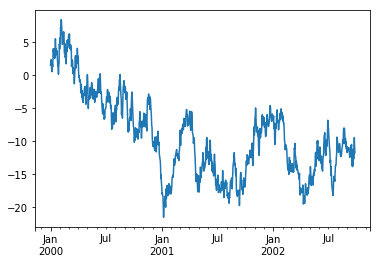

In [9]:
ts.plot()

In [10]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=['A', 'B', 'C', 'D'])

In [11]:
df.head()

,A,B,C,D
2000-01-01,0.664930,-0.470308,1.073147,0.915724
2000-01-02,0.581547,0.915723,-0.616087,1.917839
2000-01-03,-1.066371,-1.341858,0.861383,-0.472370
2000-01-04,1.150478,-0.292417,-0.034623,-0.748021
2000-01-05,0.336054,0.875936,-0.555798,-0.606246


In [12]:
df = df.cumsum()

In [13]:
df.head()

,A,B,C,D
2000-01-01,0.664930,-0.470308,1.073147,0.915724
2000-01-02,1.246478,0.445415,0.457060,2.833563
2000-01-03,0.180107,-0.896443,1.318443,2.361193
2000-01-04,1.330585,-1.188861,1.283820,1.613171
2000-01-05,1.666639,-0.312925,0.728022,1.006925


In [14]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

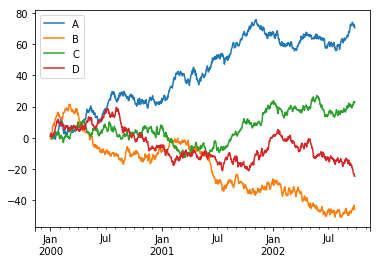

In [17]:
df.plot()

In [ ]:
#plt.legend(loc='best')

## Getting data in/out

### CSV

In [ ]:
df.to_csv('foo.csv')

In [ ]:
pd.read_csv('foo.csv').head()

### HDF5

#### Reading and writing to HDFStores.

In [ ]:
df.to_hdf('foo.h5', 'df')

In [ ]:
pd.read_hdf('foo.h5', 'df').head()

### Excel

In [ ]:
 df.to_excel('foo.xlsx', sheet_name='Sheet1')

In [ ]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA']).head()

## Gotchas

### If you are attempting to perform an operation you might see an exception like:

In [ ]:
if pd.Series([False, True, False]):
    print("I was true")

In [ ]:
if pd.Series([False, True, False]).any():
    print("I was true")

In [ ]:
if pd.Series([False, True, False]).all():
    print("I was true")

In [ ]:
if pd.Series([True, True, True]).all():
    print("I was true")